In [2]:
import matplotlib.pyplot as plt

from poles_roots.global_zero_pole import find_zeros_poles
from poles_roots import reference_problems
from poles_roots.plotting import phase_plot, plot_poles_zeros

## Pole on diagonal

The first possible edge case is that a pole lies on a diagonal of the triangulation. We can detect this as the quadrature will not converge. In which case we break the diagonal on which the quadrature does not converge. This is shown in the following example.

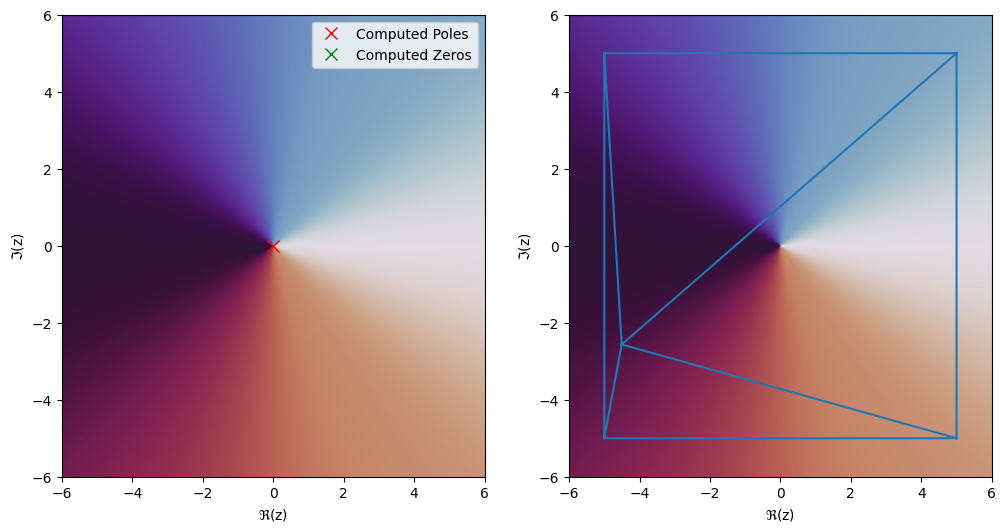

In [3]:
res = find_zeros_poles(
    lambda z: 1/z,
    lambda z: -1/z**2,
    points=[-5 - 5j, 5 - 5j, 5 + 5j, -5 + 5j],
    arg_principal_threshold=1.1,
    num_sample_points=50,
)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
phase_plot(lambda z: 1/z, axs[0], domain=[-6, 6, -6, 6])
phase_plot(lambda z: 1/z, axs[1], domain=[-6, 6, -6, 6])
plot_poles_zeros(res, axs[0])
axs[0].legend()
axs[1].triplot(res.points[:, 0], res.points[:, 1], res.simplices)
plt.show()

If there is a pole on the convex hull we cannot break that edge without changing the convex hull so instead we raise an error.